In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart.csv')

in order to add a fake string column to our dataset for various reasons, we use string and random libraries, and with the help of a method, we make a random combination of letters and digits. then we call that function to add to our dataset using a for loop.

In [3]:
import random
import string

In [4]:
def random_string(length=5):
    return ''.join(random.choices(string.ascii_letters, k=length))

df['code'] = [random_string() for _ in range(len(df))]
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,code
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,IioZS
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,jTqsL
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,jjJPe
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,jRjLM
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,IBDwy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,zWSTq
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,sbYyT
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,qgUul
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,fIYqN


we use get_dummies to convert columns with 2 more constants to multiple columns that each has a true false value. Remember that it also deleted the original column so now after using the restecg column, it now converts to 3 columns.

In [5]:
df = pd.get_dummies(df, columns=['restecg'])
df

,age,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,target,code,restecg_0,restecg_1,restecg_2
0,52,1,0,125,212,0,168,0,1.0,2,2,3,0,IioZS,False,True,False
1,53,1,0,140,203,1,155,1,3.1,0,0,3,0,jTqsL,True,False,False
2,70,1,0,145,174,0,125,1,2.6,0,0,3,0,jjJPe,False,True,False
3,61,1,0,148,203,0,161,0,0.0,2,1,3,0,jRjLM,False,True,False
4,62,0,0,138,294,1,106,0,1.9,1,3,2,0,IBDwy,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,164,1,0.0,2,0,2,1,zWSTq,False,True,False
1021,60,1,0,125,258,0,141,1,2.8,1,1,3,0,sbYyT,True,False,False
1022,47,1,0,110,275,0,118,1,1.0,1,1,2,0,qgUul,True,False,False
1023,50,0,0,110,254,0,159,0,0.0,2,0,2,1,fIYqN,True,False,False


we can use groupby! we first select the factor we want to group the records and we can use additional methods such as .size() to see how many are in that category

In [6]:
df.groupby('sex').size()

sex
0    312
1    713
dtype: int64

In [7]:
df.groupby('age').size()


age
29     4
34     6
35    15
37     6
38    12
39    14
40    11
41    32
42    26
43    26
44    36
45    25
46    23
47    18
48    23
49    17
50    21
51    39
52    43
53    26
54    53
55    30
56    39
57    57
58    68
59    46
60    37
61    31
62    37
63    32
64    34
65    27
66    25
67    31
68    12
69     9
70    14
71    11
74     3
76     3
77     3
dtype: int64

In [8]:
df.groupby('sex')['age'].count()

sex
0    312
1    713
Name: age, dtype: int64

here we are having a list of all clients that actually have the illness and we have categorized them based on their age

In [9]:
df[df['target'] == 1].groupby('age').size()


age
29     4
34     6
35     8
37     6
38     8
39    10
40     3
41    29
42    22
43    15
44    26
45    19
46    12
47    10
48    12
49     9
50    12
51    29
52    28
53    18
54    32
55    10
56    17
57    21
58    24
59    15
60    10
61     3
62    13
63     9
64    19
65    12
66    14
67     9
68     6
69     6
70     3
71    11
74     3
76     3
dtype: int64

we can also group by multiple columns

In [10]:
df.groupby(['sex', 'target']).size()


sex  target
0    0          86
     1         226
1    0         413
     1         300
dtype: int64

In [11]:
df.groupby('sex')['age'].median()

sex
0    57.0
1    55.0
Name: age, dtype: float64

In [12]:
df.groupby('sex')['age'].mean()


sex
0    55.849359
1    53.814867
Name: age, dtype: float64

here we can have a generalized plot of our data. the .plot() method uses the pandas lists. the x axis is the number of records. the y value is a general value from minimum to maximum. some records are so close to 0 that are not possible to track. hense this is not an optimal way of viewing records.

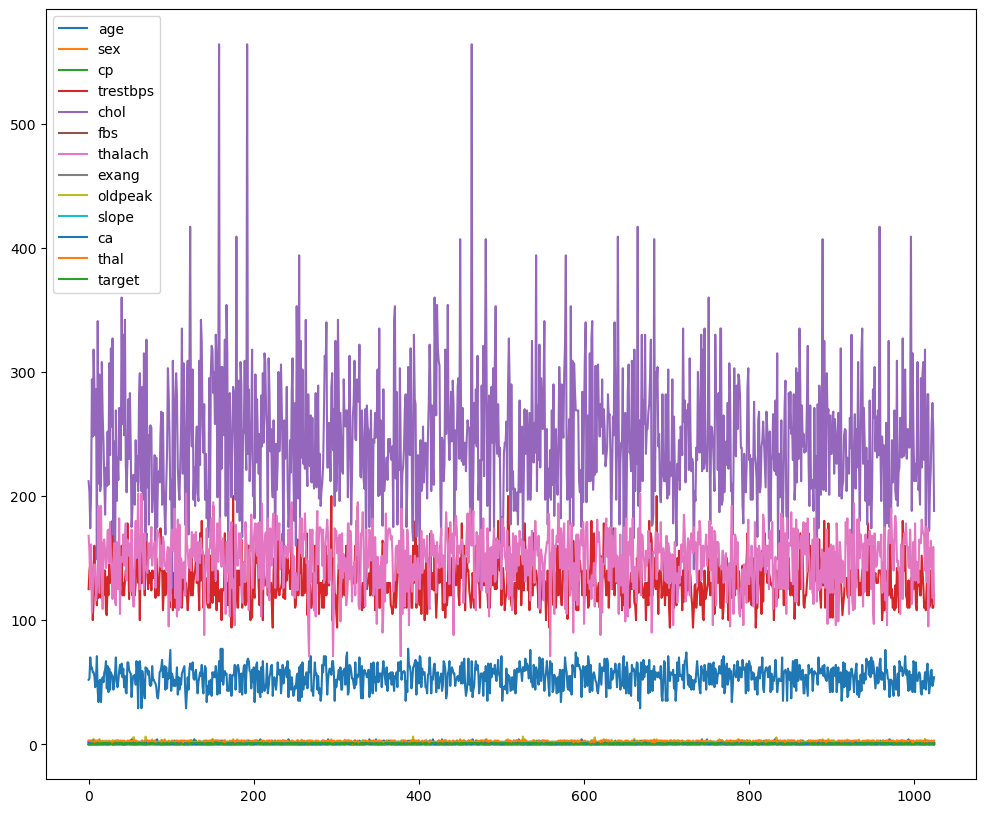

In [13]:
df.plot(figsize=(12,10))
plt.show()

we can use the argument subplots to seperate them which is a better visualization

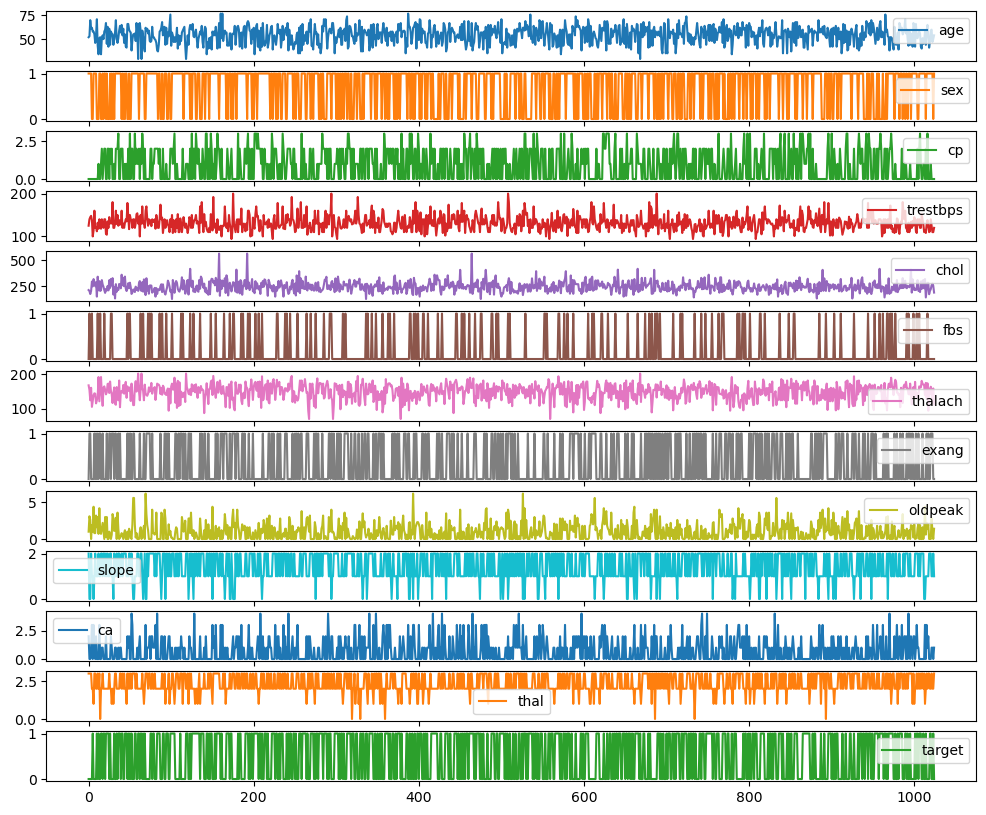

In [14]:
df.plot(subplots=True, figsize=(12, 10))
plt.show()

we can instead of plot use hist to view them seperately. personally i appreciate this one more. we use bins to see more changes in the data

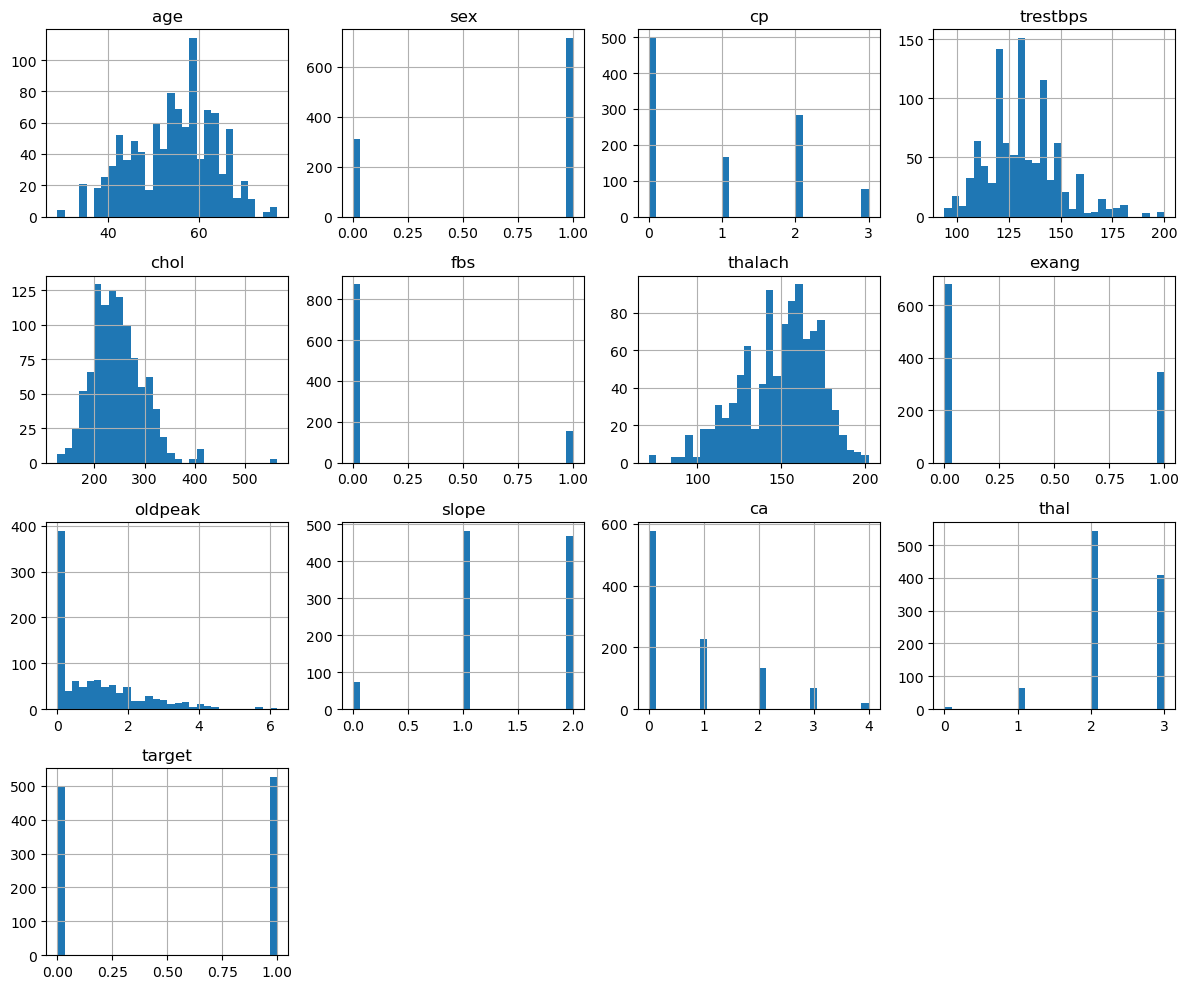

In [15]:
df.hist(bins=30, figsize=(12, 10))
plt.tight_layout()

we can also use seaborn to have better graphics for visualization

In [16]:
import seaborn as sns

kdeplot -> shows the density of data

histplot -> shows the bin view of the data. also has the argument kde to show that as well

boxenplot -> a more understanble version of boxplot that shows the variance of the data. ( needs more explanation)

countplot -> essentially shows the number of data in each category

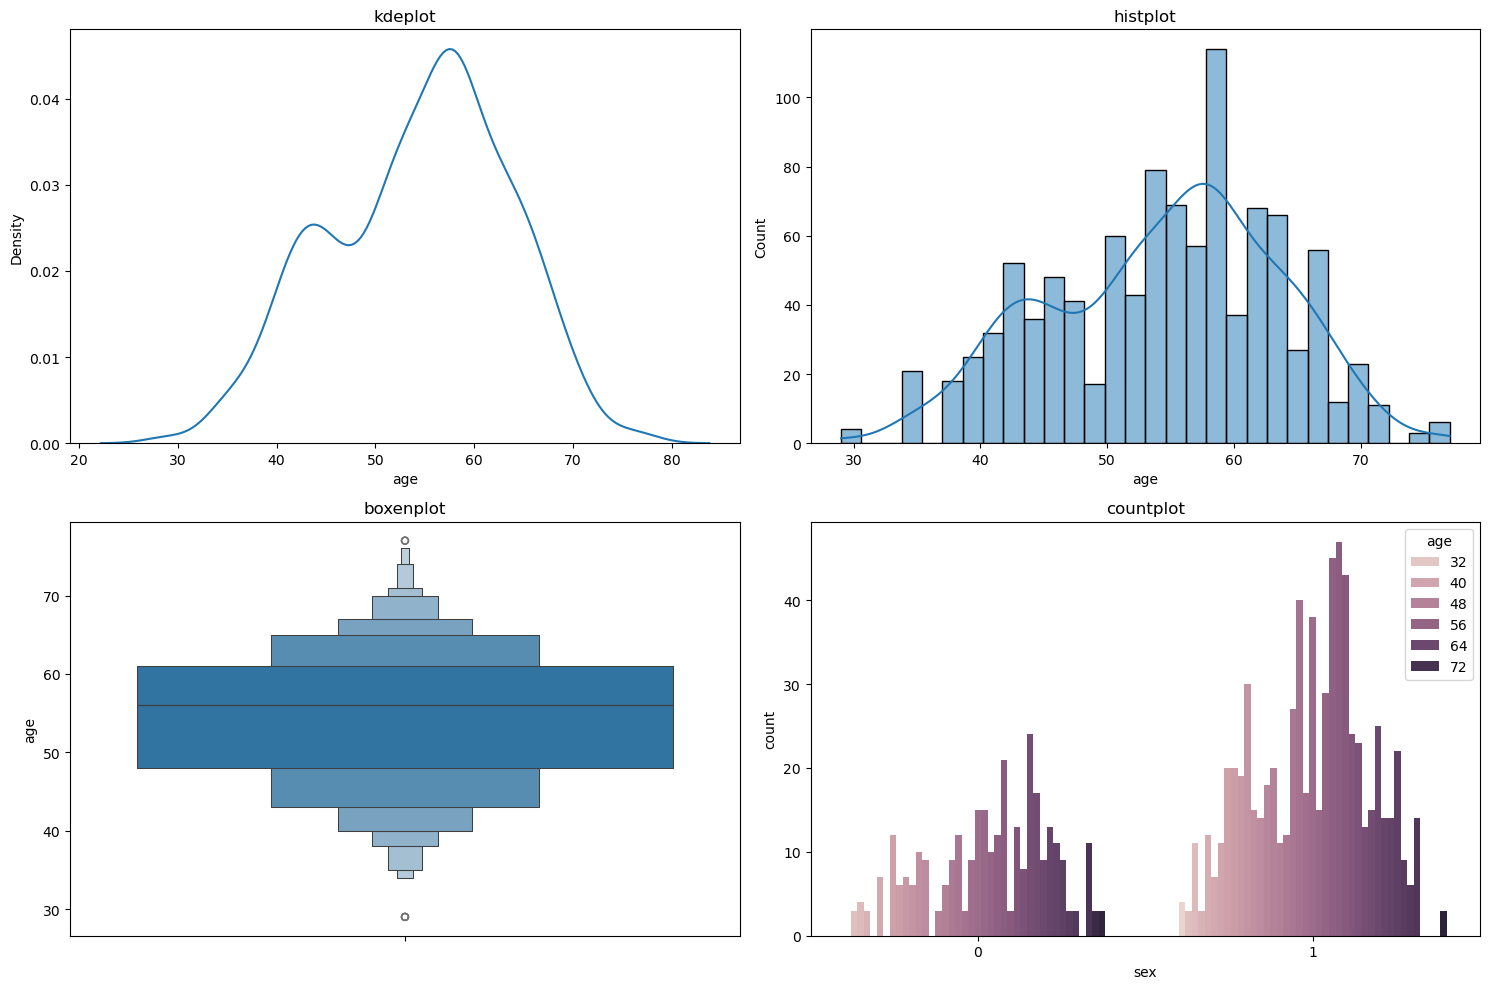

In [17]:
fig, axes = plt.subplots(2,2, figsize=(15,10))

sns.kdeplot(data=df['age'], ax=axes[0, 0])
axes[0,0].set_title('kdeplot')

sns.histplot(data=df['age'], ax=axes[0, 1],bins=30, kde=True)
axes[0,1].set_title('histplot')

sns.boxenplot(data=df['age'], ax=axes[1, 0])
axes[1,0].set_title('boxenplot')

sns.countplot(x = 'sex', hue= 'age', data=df, ax=axes[1, 1])
axes[1,1].set_title('countplot')
plt.tight_layout()

here we are just playing around with data

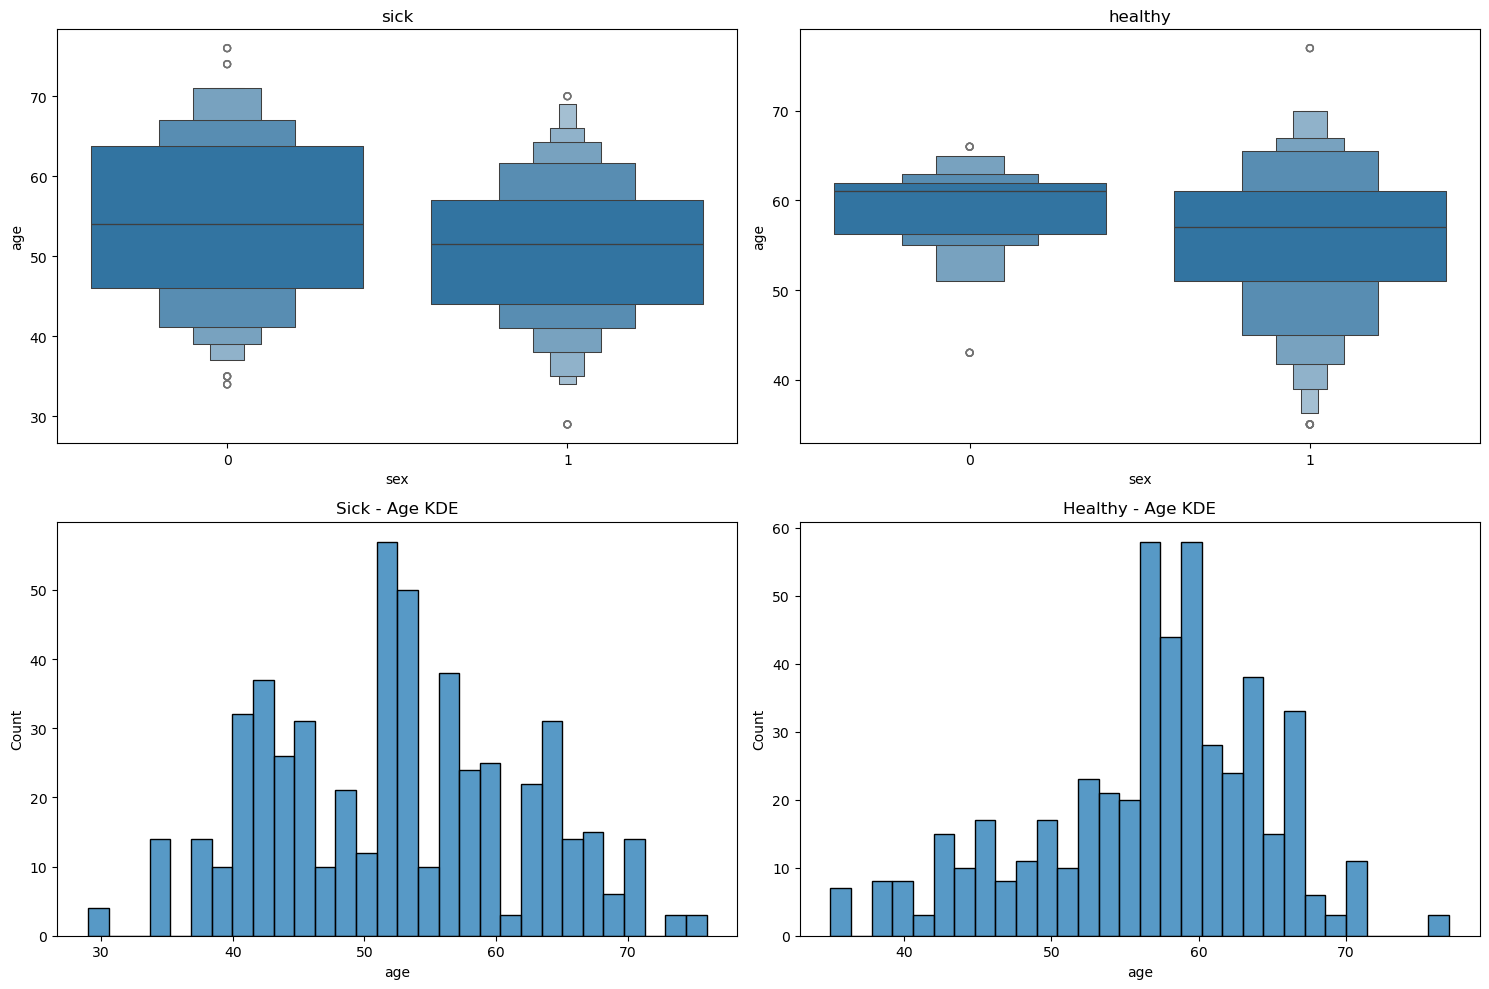

In [18]:
fig, axes = plt.subplots(2,2, figsize=(15,10))

df_sick  = df[df['target'] == 1]
df_healthy  = df[df['target'] != 1]

sns.boxenplot(data=df_sick, x='sex', y='age', ax=axes[0, 0])
axes[0, 0].set_title('sick')

sns.boxenplot(data=df_healthy, x='sex', y='age', ax=axes[0, 1])
axes[0, 1].set_title('healthy')

sns.histplot(data=df_sick['age'], ax=axes[1, 0], bins=30)
axes[1, 0].set_title("Sick - Age KDE")

sns.histplot(data=df_healthy['age'], ax=axes[1, 1], bins=30)
axes[1, 1].set_title("Healthy - Age KDE")

plt.tight_layout()